In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
rec_lamb = 2 #The reciprocal of the Poisson rate = waiting time (seconds)
num_events = 10000

In [4]:
# Insert your student number for the random seed
rg = np.random.default_rng(2034567)
wait_times = rg.exponential(rec_lamb, num_events) #The waiting

In [5]:
total_wait = np.sum(wait_times)

In [6]:
print(total_wait)

20079.89400391909


In [7]:
event_times = np.zeros(num_events)

In [8]:
for i in range(num_events):
    event_times[i] = np.sum(wait_times[: i+1])
    
event_times = np.insert(event_times, 0, 0)

In [9]:
# The initial time is at 0 and is counted as event 0
len(event_times)

10001

In [10]:
# The lengths of the intervals
i_length = 5 

In [11]:
# Number of intervals 
num_int = int(total_wait // i_length)

In [12]:
print(num_int)

4015


In [13]:
# These are going to be our counts for each 5s interval
interval_counts = np.array([0] * num_int)

In [14]:
# Lets populate the empirical frequency table
for k in range(num_int):
    interval_counts[k] = ((k*i_length < event_times) & (event_times < (k+1)*i_length)).sum()

In [15]:
# Let's have a look at the counts
interval_counts

array([0, 2, 3, ..., 2, 7, 0])

In [16]:
# Lets compute frequencies of how many tmes a count occured in a 5s interval
unique_values, counts = np.unique(interval_counts, return_counts=True)

In [17]:
unique_values, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([351, 824, 985, 884, 549, 259, 100,  49,  11,   3]))

In [18]:
# Since we will be coparing this counts to the theoretical ones lets extend the table to 10
max_n = 10

In [19]:
vals = np.linspace(0, max_n, max_n+1)
bins = vals-0.5

In [20]:
bins

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [21]:
# The theoretical expectation is
lambdat = i_length/rec_lamb
print(lambdat)

2.5


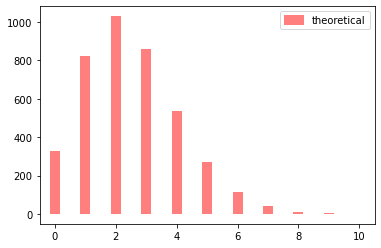

In [22]:
rv = poisson(lambdat)
fig, ax = plt.subplots(1, 1)
ax.vlines(vals, 0, num_int*rv.pmf(vals), colors='r', linestyles='-', lw=10, alpha=0.5, label='theoretical')
ax.legend(loc='best')
plt.show()

1. Add a histogram of the empirical counts to the plot of theoretical counts above. Do these two histograms match well?
2. Plot the counts against time (index of interval) as a bar chart.